In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1
#### загрузить данные, индекс переменная вида дата/время и срезать данные за 2010-2013 год

In [3]:
crime = pd.read_csv('crime.csv',index_col = 0,engine='python',parse_dates=True)
crime = crime['20100101':'20131231']
crime

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-01 00:10:00,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
2010-07-01 01:10:00,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 23:40:00,VT-2013-57230,VT,Brattleboro,Windham County,50025.0,485 W RIVER RD,BRATTLEBORO VSP,M,32.0,32.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,1.176168e+09
2013-12-31 23:45:00,VT-2013-57231,VT,Charleston,Orleans County,50019.0,VT RT 105 & SCHOOL,DERBY VSP,M,20.0,20.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,-1.794069e+09
2013-12-31 23:45:00,VT-2013-57232,VT,Bristol,Addison County,50001.0,Burpee Road,NEW HAVEN VSP,M,54.0,54.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,-4.360221e+08
2013-12-31 23:50:00,VT-2013-57233,VT,Saint Johnsbury,Caledonia County,50005.0,Memorial Dr,ST JOHNSBURY VSP,F,27.0,27.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-5.082475e+08


## Задание 2
#### построить сводную таблицу по количеству правонарушений в зависимости от пола (driver_gender) - строки и типа правонарушения (violation) - колонки. ВНИМАНИЕ! NaN должен быть заменен на 0

In [4]:
v = crime.pivot_table(index = 'driver_gender',values = 'violation', columns = crime['violation'], aggfunc = 'count')
v = v.replace(np.nan, 0)
v

violation,DUI,Equipment,Moving violation,Other,Other (non-mapped)
driver_gender,,,,,
F,136.0,12055.0,49876.0,2047.0,0.0
M,364.0,20154.0,87846.0,3697.0,1.0


## Задание 3
#### найти помесячное количество преступлений и постройте столбцовый график

1     10976
2     11878
3     14178
4     11989
5     15475
6     12527
7     18288
8     16370
9     15382
10    16245
11    17990
12    14878
Name: violation, dtype: int64

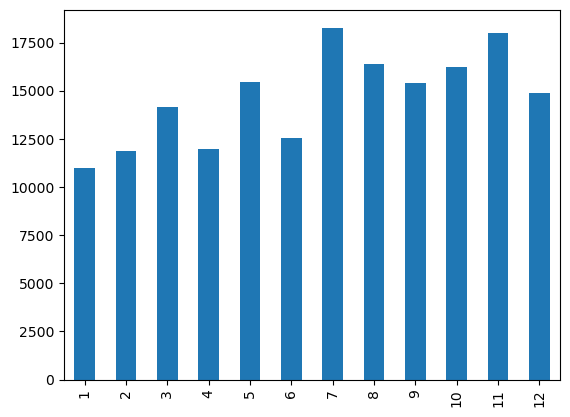

In [6]:
mon = crime.violation.groupby(by = crime.index.month).count()
mon.T.plot(kind = 'bar', stacked = True);
mon

## Задание 4
#### отобрать волителей под веществами violation -> DUI (Driving under the influence). Существует ли зависимость на наборе данных водителей DUI от дня недели и какая? Построить график и описать зависимость.

In [7]:
dui_df = crime.copy()
dui_df = dui_df[dui_df['violation'] == 'DUI']
dui_df

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-04 01:38:00,VT-2010-00910,VT,Waterbury,Washington County,50023.0,VT RT 18,ST JOHNSBURY VSP,M,29.0,29.0,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
2010-07-04 15:50:00,VT-2010-01035,VT,Sherburne,Chittenden County,50007.0,VT RT 103,RUTLAND VSP,F,27.0,27.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,-2.980731e+08
2010-07-05 23:40:00,VT-2010-01535,VT,Guildhall,Essex County,50009.0,2000 I 91 N; MM2 I 91 N,BRATTLEBORO VSP,F,25.0,25.0,...,Asian,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,3.644600e+08
2010-07-07 14:00:00,VT-2010-01722,VT,Waterford,Caledonia County,50005.0,MAD BROOK RD,ST JOHNSBURY VSP,M,41.0,41.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,5.863135e+08
2010-07-10 21:35:00,VT-2010-02178,VT,East Montpelier,Washington County,50023.0,VT RT 14 N,MIDDLESEX VSP,M,50.0,50.0,...,Hispanic,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-21 00:30:00,VT-2013-55624,VT,Royalton,Windsor County,50027.0,VT RT 107,ROYALTON VSP,M,41.0,41.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,-7.206477e+07
2013-12-27 20:55:00,VT-2013-56483,VT,Guilford,Windham County,50025.0,GUILFORD CENTER RD & TATER LN,BRATTLEBORO VSP,F,53.0,53.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,3.644600e+08
2013-12-27 21:35:00,VT-2013-56488,VT,Swanton,Franklin County,50011.0,Vt 78,ST ALBANS VSP,M,65.0,65.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,6.879160e+08
2013-12-28 23:00:00,VT-2013-56675,VT,Montgomery,Franklin County,50011.0,Vr 118,ST ALBANS VSP,M,55.0,55.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,6.879160e+08


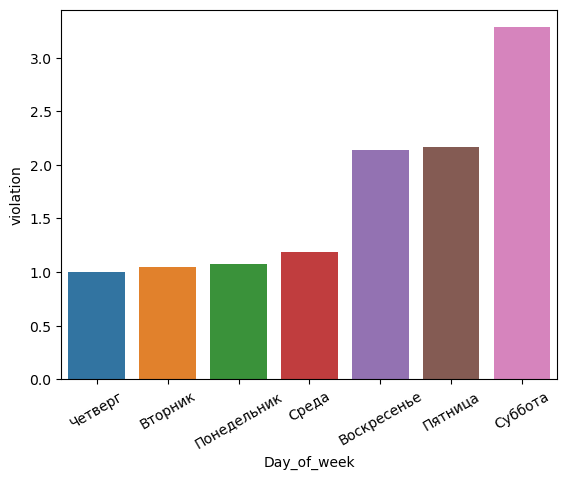

In [8]:
dui_df['Day_of_week'] = dui_df.index.dayofweek
dui_df['Day_of_week'] = dui_df['Day_of_week'].replace([0,1,2,3,4,5,6], ['Понедельник', 'Вторник','Среда',
                                                                        'Четверг','Пятница',
                                                                      'Суббота','Воскресенье'])
days = dui_df[dui_df['Day_of_week'] == 'Четверг'].count()['Day_of_week']
dui_df_day_of_week = pd.DataFrame(dui_df.groupby('Day_of_week').count()['violation']/days).sort_values('violation')

sns.barplot(data = dui_df_day_of_week, x = dui_df_day_of_week.index, y = 'violation');
plt.xticks(rotation = 30);

#### Делаем вывод, что в выходные у нас становится больше не трезвых водителей, что и логично, выходные же ;)

## Задание 5
#### для самого "пьяного дня" найти самый "пьяный час", визулализировать для подтверждения 

In [13]:
most_dr = dui_df_day_of_week.sort_values('violation')[-1:].index
most_dr

Index(['Суббота'], dtype='object', name='Day_of_week')

23

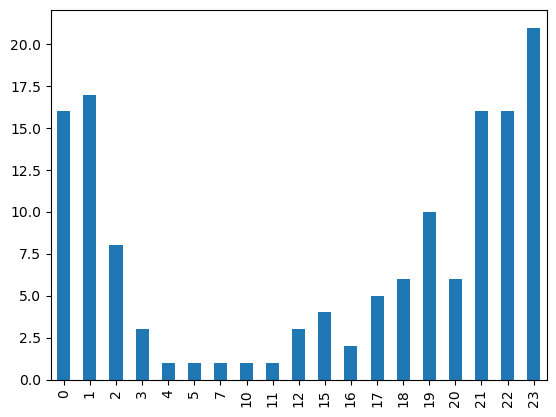

In [14]:
mosthh = dui_df[dui_df['Day_of_week'] == 'Суббота']
hh = mosthh.violation.groupby(by = mosthh.index.hour).count()
hh.T.plot(kind = 'bar', stacked = True);
hh.idxmax()

## Задание 6.1
#### построить сводную таблицу по количеству правонарушений (строки - пол, колонки - расса). Ответ таблица DataFrame: строки - пол, колонки - расса, значения - количество правонарушений

In [16]:
gender_race = pd.crosstab(crime['driver_gender'],crime['driver_race']) #бесполезность 
gender_race

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,589,759,322,48,62396
M,1465,2532,1198,126,106741


## Задание 6.2
#### построить сводную таблицу по процентам в зависимости от рассы (100% для каждой рассы) и пола внутри рассы (например, белые мужчины 0.8, белые женщины 0.2). Ответ таблица: строки - пол, колонки - расса, значения - процент правонарушений в зависимости от рассы

In [18]:
prob = gender_race.apply(lambda x: (x/sum(x))*100, axis=0, raw=False, result_type=None)
prob

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,28.675755,23.062899,21.184211,27.586207,36.890804
M,71.324245,76.937101,78.815789,72.413793,63.109196


## Задание 6.3
#### результат предыдущей таблицы визуализировать на столбцовом графике с высотой столбца 1 для каждой рассы и разделением внутри по полу (внимание! легенда на графике - какой пол каким цветом). Ответ график из столбцов (каждый столюец разделен на две разноцветные части)

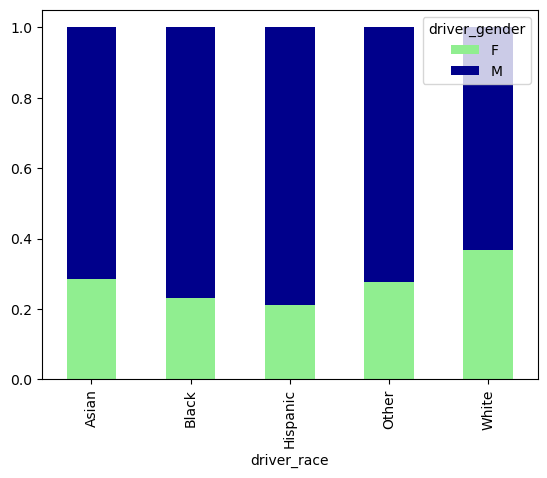

In [19]:
g = prob/100
g.T.plot(kind = 'bar', stacked = True, color = ['lightgreen', 'darkblue']);